In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Importing into dataframe

df_Top_10_By_GenereWithTopPlayers = pd.read_excel("./data/Top_10_By_Genre_Top_Players_new.xlsx", sheet_name='Export')
df_Stars = pd.read_excel ('./data/df_StarActors_NoDups.xlsx', sheet_name='Export')
df_Bankability = pd.read_excel ('./Prj_Data/ImdbScrapingData/TheNumbers/output/DFBankaability.xlsx', sheet_name='Export')

BOX PLOTS TO CREATE CRITERIA FOR "A PLAYERS"

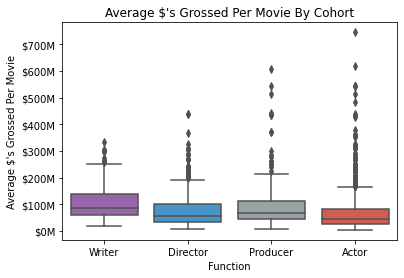

In [2]:
# Show box plot of average dollars generated per movie for entire population

df_Stars_short = df_Stars[["Contribution", "Movies", "Average"]]
# fig, ax = plt.subplots(figsize=(11, 8));
fig, ax = plt.subplots();
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(sns.color_palette(flatui))


g = sns.boxplot(x="Contribution", y="Average", data=df_Stars_short, order=["Writer", "Director", "Producer", "Actor"]);
ylabels = ['${:,.0f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels);

# g.legend().set_title('Average $ Generated Per Movie ($M)');
plt.ylabel("Average $'s Grossed Per Movie");
plt.xlabel("Function");
plt.title("Average $'s Grossed Per Movie By Cohort");

# print(ax.artists[1].get_facecolor)


plt.savefig("BoxPlot-Average$.pdf",transparent=True); 

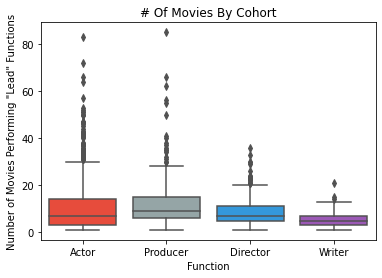

In [3]:
df_Stars_short = df_Stars[["Contribution", "Movies", "Average"]]
# fig, ax = plt.subplots(figsize=(11, 8));
fig, ax = plt.subplots();

g = sns.boxplot(x=df_Stars["Contribution"], y="Movies", data=df_Stars_short, order=[ "Actor", "Producer", "Director","Writer"] )

plt.ylabel('Number of Movies Performing "Lead" Functions');
plt.xlabel("Function");
plt.title("# Of Movies By Cohort");

Actor = ax.artists[0]
Producer = ax.artists[1]
Dir = ax.artists[2]
Writer = ax.artists[3]

# Change the appearance of that box

Actor.set_facecolor("#e74c3c")
Producer.set_facecolor("#95a5a6")
Dir.set_facecolor("#3498db")
Writer.set_facecolor("#9b59b6")


plt.savefig("BoxPlot-#OfMovies.png",transparent=True); 



BOX PLOTS END

SCATTER PLAT SHOWING A PLAYERS BY TOP MOST PROFITABLE MOVIES BY GENERA

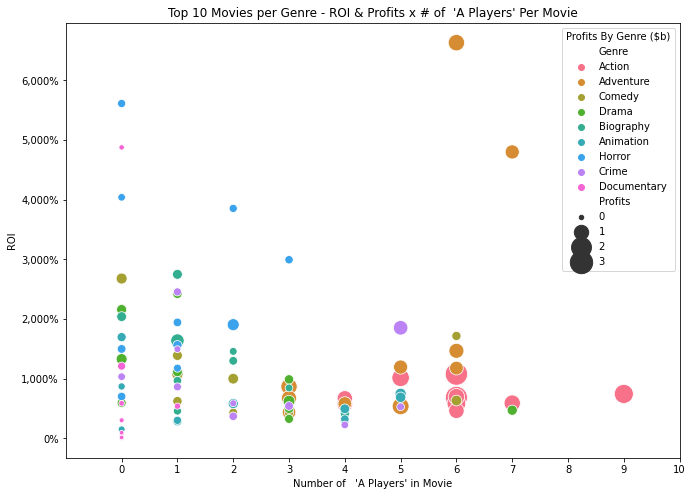

In [4]:
fig, ax = plt.subplots(figsize=(11, 8));  
g = sns.scatterplot(ax=ax,y="ROIPercent", x="Total",hue="Genre", size="Profits", sizes=(20, 500), data=df_Top_10_By_GenereWithTopPlayers);
g.set(xlim = (-1,10), xticks=[0,1,2,3,4,5,6,7,8,9,10],);


plt.ylabel("ROI");
plt.xlabel("Number of   'A Players' in Movie");
plt.title("Top 10 Movies per Genre - ROI & Profits x # of  'A Players' Per Movie");

# ylabels = ['{:,.0f}'.format(y) + 'B' for y in g.get_yticks()/1000]
# g.set_yticklabels(ylabels)
ylabels = ['{:,.0f}'.format(y) + '%' for y in g.get_yticks()]
g.set_yticklabels(ylabels);

g.legend().set_title('Profits By Genre ($b)');
plt.ylabel("ROI");
plt.xlabel("Number of   'A Players' in Movie");
plt.title("Top 10 Movies per Genre - ROI & Profits x # of  'A Players' Per Movie");


plt.savefig("ProfitsByPlayers.png",transparent=True); 

BARH CHART SHOWING BANKABILITYA

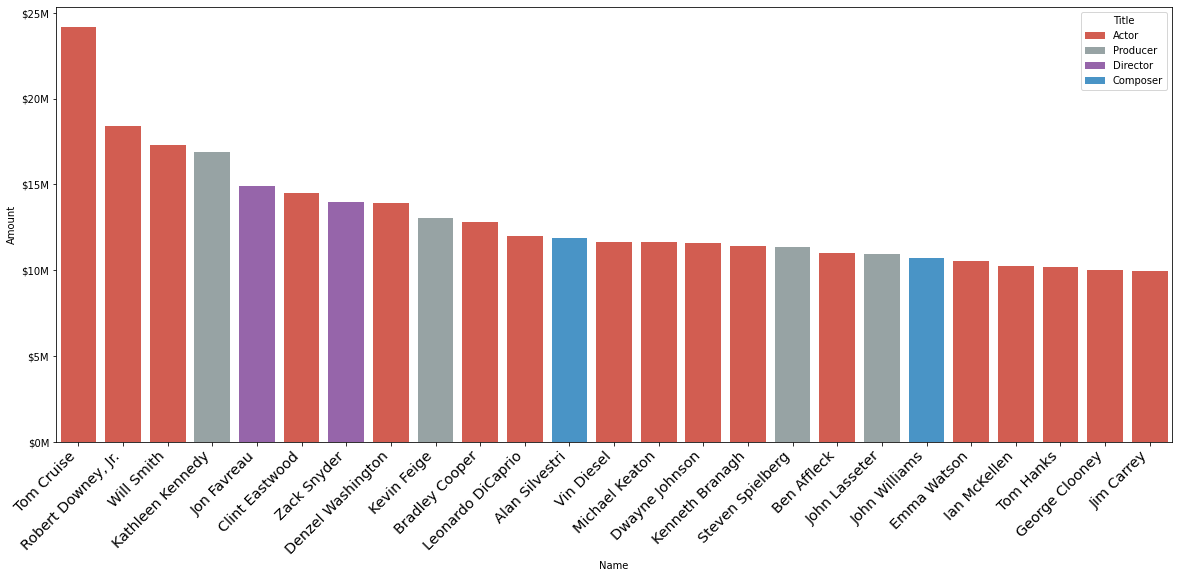

In [5]:
fig, ax = plt.subplots(figsize=(20, 8));  
df_Bankability_Short = df_Bankability.head(25);

g = sns.barplot(ax=ax,y="Amount", x="Name", hue="Title", data=df_Bankability_Short, 
                palette=["#e74c3c", "#95a5a6","#9b59b6", "#3498db", "#34495e", "#2ecc71"], dodge=False);

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',
    fontsize='x-large');

ylabels = ['${:,.0f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels);
